In [79]:
# Q.2 Batch SVD

In [80]:
%matplotlib inline

In [81]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [82]:
X = []
y = []
data_admitted = []
data_not_admitted = []
csv_delimiter = ','

def open_file_and_load_data(filename):
    global data_admitted, data_not_admitted, X, y
    fields = ['exam1', 'exam2', 'status']
    df = pandas.read_csv(filename, sep=csv_delimiter, names=fields)
    dataSer = df.values
    for ir in dataSer:
        X.append([ float(ir[0]), float(ir[1]) ])
        y.append([float(ir[2])])
        if (int(ir[2]) == 0):
            data_not_admitted.append(np.array([float(ir[0]),float(ir[1])]))
        else:
            data_admitted.append(np.array([float(ir[0]),float(ir[1])]))
    data_admitted = np.array(data_admitted)
    data_not_admitted = np.array(data_not_admitted)
    X = np.array(X)
    #Note that func should also adds a column of ones for us, so the intercept term is handled
    X = np.insert(X,0,1,axis=1)
    y = np.array(y)

In [83]:
open_file_and_load_data("./ex2-003/mlclass-ex2/ex2data2.txt")
from scipy.special import expit
import random

In [84]:
from sklearn.preprocessing import PolynomialFeatures

degree = 6

def mapFeature(X1, X2):
    poly = PolynomialFeatures(degree)
    finalX = np.append(X1, X2, 1)
    mapX = poly.fit_transform(finalX)
    print ("Shape of mapped X, ", (mapX.shape))
    return mapX
mapX = mapFeature(X[:,1].reshape(-1,1),X[:,2].reshape(-1,1))

# returns the cost and gradient for logistic regression [J, grad]
def calcCostReg(theta, X, y, lamb):
    #m is the total size of training set
    m = y.size
    # hypothesis function
    h = expit(np.dot(X,theta))
    
    first = np.log(h).T.dot(y)
    second = np.log(1-h).T.dot(1-y)
    
    third =  (lamb/(2*m)) * np.sum(np.square(theta[1:]))
    if (m != 0):
        J = -1*(1/m)*(first + second) + third
        if np.isnan(J[0]):
            return(np.inf)
        return J[0]
    else:
        print ("M is zero.. Cannot calculate J\n")
        return -1

Shape of mapped X,  (118, 28)


In [85]:
def batch_sgd(X,y,theta,learning_rate,max_iters=1000,tolerance=1e-5, batch_size=10):
    prevJ = 0.0
    theta = theta.reshape(-1,1)
    finalJ = []
    for x in range(max_iters):
        r_ind = random.sample(range(len(X)), batch_size)
        X_new = X[r_ind]
        y_new = y[r_ind]
        hypothesis = expit(np.dot(X_new, theta))
        loss = hypothesis - y_new
        gradient = (np.dot(X_new.T, loss))
        theta = theta - learning_rate * gradient * 1/batch_size 
        J = calcCostReg(theta, X, y, 1)
        finalJ.append(J[0])
#         print ("iter %s | J: %.3f" % (x, J))      
        if x == 0:
            prevJ = J
        else:
            if  abs(prevJ - J) < tolerance:
                break
            prevJ = J
    return (theta, finalJ, x)

In [86]:
initial_theta = np.zeros(mapX.shape[1])
#Sample
result = batch_sgd(mapX, y, initial_theta, 0.5, 400)
print ("For LR value 0.5 iterations = ", result[2], " cost = ", result[1], " theta = ", result[0])

For LR value 0.5 iterations =  66  cost =  [0.68429124444355605, 0.68040186800155777, 0.67756072328134787, 0.67291877948118628, 0.668645950531775, 0.66695339975789869, 0.66875720801112548, 0.66452433528068178, 0.6627211710398736, 0.65540128048034418, 0.65468441446951309, 0.65299589298119087, 0.64770958770000353, 0.6474798015483002, 0.64597373732815766, 0.64420964390783919, 0.6375991926271749, 0.6323900437444423, 0.63061652781839606, 0.62942110229999981, 0.62709942264757157, 0.62415677516551493, 0.62161256280414912, 0.61848634798016833, 0.61705737619288992, 0.61546410529370132, 0.61457945171274919, 0.61372593749757542, 0.61143875283858151, 0.61178785255762325, 0.6108082586443232, 0.60809438229700563, 0.60853995476277589, 0.60488635484858, 0.60486033158056718, 0.60537893810642129, 0.60242099748423017, 0.60234971124786407, 0.60015640968478456, 0.60216876570703548, 0.60167784847314154, 0.59530166308543342, 0.59492472494667314, 0.59361954054246835, 0.59574361679115995, 0.60266189038050288, 

Calculating for learning value =  0.01
Total iterations observed =  9
10 10
Calculating for learning value =  0.03
Total iterations observed =  26
27 27
Calculating for learning value =  0.05
Total iterations observed =  144
145 145
Calculating for learning value =  0.08
Total iterations observed =  139
140 140
Calculating for learning value =  0.1
Total iterations observed =  36
37 37
Calculating for learning value =  0.3
Total iterations observed =  101
102 102
Calculating for learning value =  0.4
Total iterations observed =  131
132 132
Calculating for learning value =  0.5
Total iterations observed =  399
400 400
Calculating for learning value =  0.6
Total iterations observed =  170
171 171


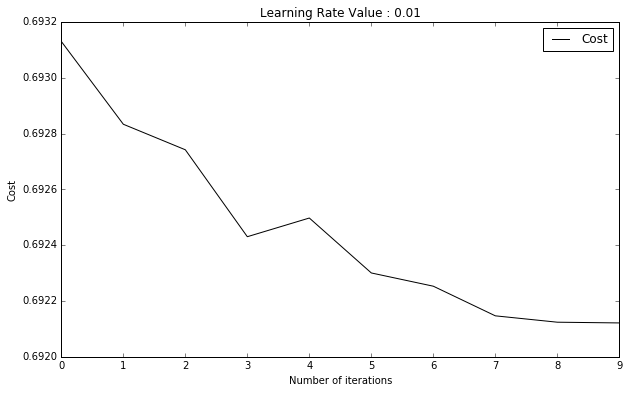

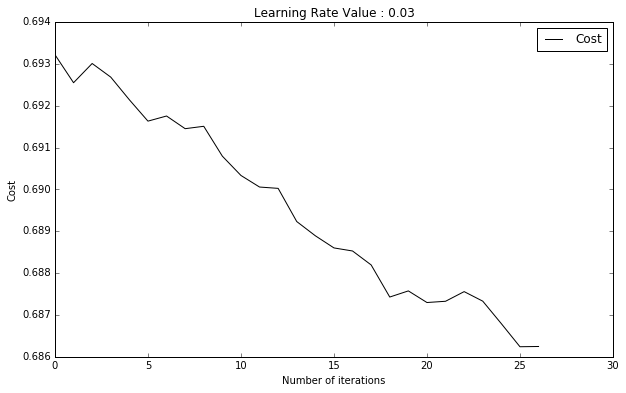

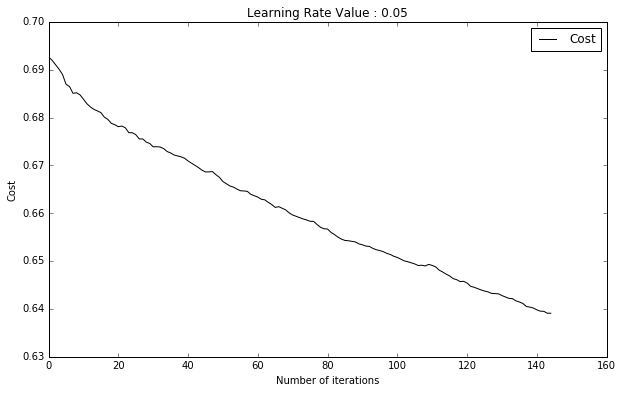

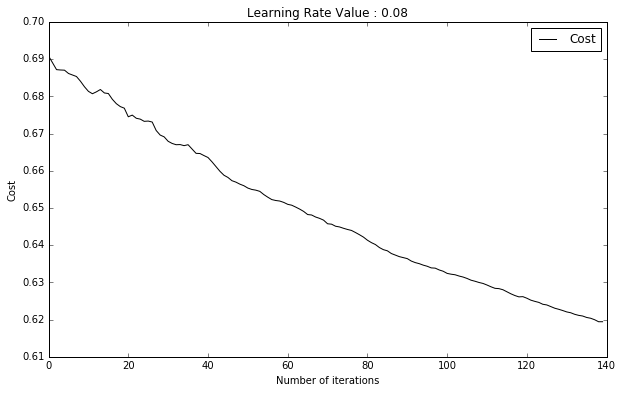

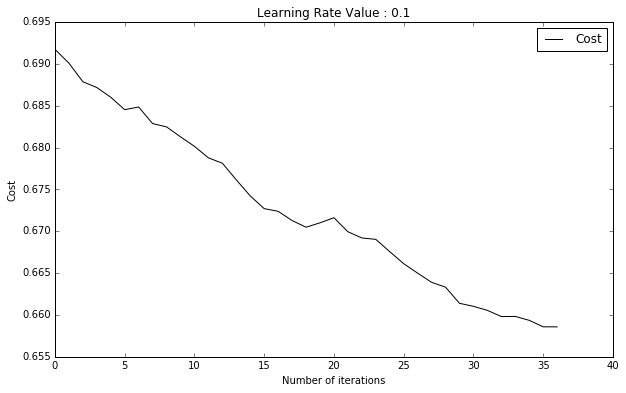

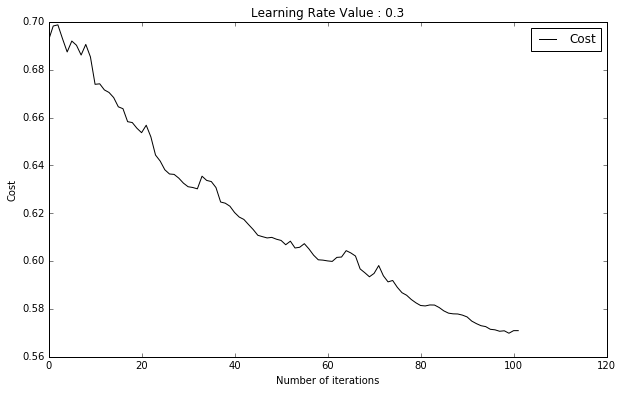

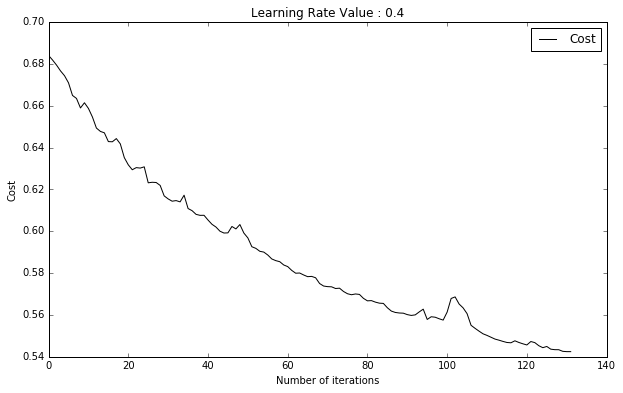

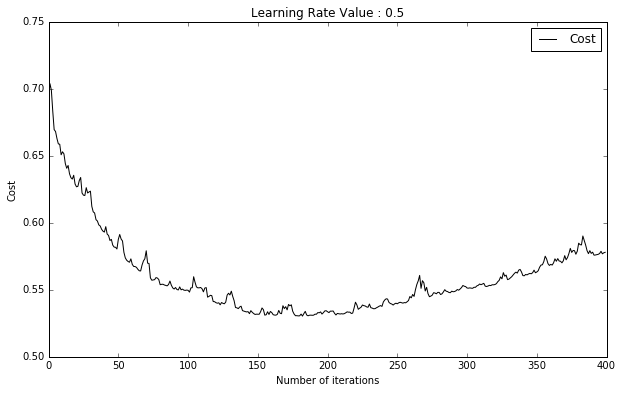

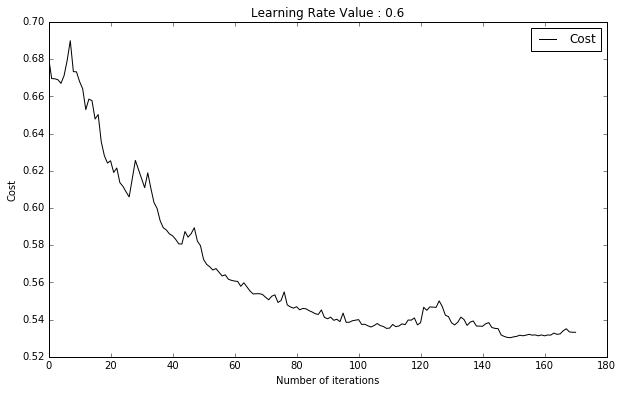

In [87]:
lr_values = [0.01, 0.03, 0.05, 0.08, 0.1, 0.3, 0.4, 0.5, 0.6]

def plotGraph(xvals, yvals, l):
    plt.figure(figsize=(10,6))
    plt.plot(xvals, yvals, color= 'black', label='Cost')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.legend()
    title = 'Learning Rate Value : ' + str(l)
    plt.title(title)
    plt.plot()
# lr_values=[0.1]    
for l in lr_values:
    num_iter = []
    cost_iter = []
    print ("Calculating for learning value = ", l)
    # Optimize costFunctionReg
    result = batch_sgd(mapX, y, initial_theta, l, 400)
    print ("Total iterations observed = ", result[2])
    num_iter = list(range(result[2]+1))
    cost_iter = result[1]
    print (len(num_iter), len(cost_iter))
    plotGraph(num_iter, cost_iter, l)    
    

In [88]:
# We see a steady decrease in the cost function with the SGD.